# üß† EDA: An√°lisis del √©xito en Youtube

El siguiente An√°lisis de Datos Explorativo se centrar√° en investigar los datos del ***Top 1000 mundial de youtubers*** mediante los datos que nos aporta [este enlace](https://www.kaggle.com/datasets/computingvictor/top1000youtubers).  
Dicho ranking se basa como podremos ver a continuaci√≥n, en la cantidad de suscriptores que acumula cada youtuber.
Tambi√©n tendremos acceso a su Pa√≠s de origen, las Visitas, Likes y Comentarios que reciben, as√≠ como la Categor√≠a de sus v√≠deos.

Este EDA se centrar√° en intentar confirmar o desmentir la relevancia de la acumulaci√≥n de suscriptores dentro de la plataforma Youtube con respecto al relativo √©xito de los canales de contenido.
Para ello, se realizar√°n las siguientes acciones (tras la carga, limpieza y preparaci√≥n de los datos):

Iniciaremos el an√°lisis observando los **Top 10 que consideremos m√°s relevantes**: youtubers totales por pa√≠s, categor√≠as con mas suscriptores...

Tras analizar lo obtenido intentaremos hallar mediante un **Heatmap** alg√∫n tipo de relaci√≥n entre las cifras que nos otorgan las columnas de Suscriptores, Visitas, Likes y Comentarios. 
La hubiese o no, tras ello analizaremos las de menor y mayor √≠ndice de relaci√≥n.

Para terminar, se expondr√°n las conclusiones derivadas del an√°lisis. 

### üîß 1. Carga y Preparaci√≥n de Datos

Para poder llevar a cabo este an√°lisis, tendremos que importar las siguientes librer√≠as de Python.

In [ ]:
# importaci√≥n librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


Una vez hayamos importado las librer√≠as, cargamos el dataset y observamos los cinco puestos mas altos y bajos del ranking para determinar posibles problemas futuros.

In [ ]:
# cargar dataset
df = pd.read_csv("data/youtubers_df.csv")

# Top 5
df.head()

Rank       Username           Categories   Suscribers         Country  \
0    1        tseries       M√∫sica y baile  253500000.0           India   
1    2        MrBeast   Videojuegos, Humor  210100000.0  Estados Unidos   
2    3      CoComelon            Educaci√≥n  168100000.0         Unknown   
3    4       SETIndia                  NaN  165400000.0           India   
4    5  KidsDianaShow  Animaci√≥n, Juguetes  116500000.0         Unknown   

       Visits      Likes  Comments  \
0    111300.0     3200.0     120.0   
1  95400000.0  5400000.0   16600.0   
2   4100000.0    21600.0       0.0   
3     23300.0      239.0       9.0   
4   4100000.0     8800.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...

In [ ]:
# Bottom 5
df.tail()

Rank          Username      Categories  Suscribers         Country  \
995   996       morharyanvi  M√∫sica y baile  12300000.0           India   
996   997  UTKARSHCLASSES13       Educaci√≥n  12300000.0           India   
997   998         MBCMASRtv             NaN  12300000.0          Egipto   
998   999               NFL        Deportes  12300000.0  Estados Unidos   
999  1000        MykeTowers  M√∫sica y baile  12300000.0        Colombia   

       Visits   Likes  Comments  \
995  168900.0  3800.0     784.0   
996   20100.0  1300.0      47.0   
997    2300.0    40.0       4.0   
998   26000.0   604.0      53.0   
999   96100.0  3400.0     128.0   

                                                 Links  
995  http://youtube.com/channel/UC_Rh_RLrouZHPf2vUF...  
996  http://youtube.com/channel/UCLuBF4Xr1-BIpcpFFm...  
997  http://youtube.com/channel/UCnFKsbAof9fRv614I4...  
998  http://youtube.com/channel/UCDVYQ4Zhbm3S2dlz7P...  
999  http://youtube.com/channel/UCLk8IJ1TwI7Xl7UUfA...

Podemos observar, que existen valores **NaN** en la columna de Categor√≠as y que algunos youtubers no tienen fijado su Pa√≠s de origen **(Unknown)**.
Adem√°s parece que algunas categor√≠as contienen signos de puntuaci√≥n que podr√≠an darnos alg√∫n problema a la hora de ejecutar nuestro c√≥digo.  
En la siguiente secci√≥n analizaremos m√°s profundamente el dataset para encontrar otras posibles irregularidades y darles soluci√≥n.

Para finalizar la preparaci√≥n inicial, asignaremos un [estilo](https://interactivechaos.com/es/manual/tutorial-de-seaborn/estilos-disponibles) a nuestros gr√°ficos:

In [21]:
sns.set_style("whitegrid")

### üîç 2. An√°lisis y limpieza del Dataset

Empecemos por identificar las columnas con valores nulos **(NaN)** y los tipos de datos que nos aporta cada columna:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Username    1000 non-null   object 
 2   Categories  676 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


Comprobamos que como pudimos observar en el vistazo inicial, la columna Categor√≠as tiene valores nulos **(NaN)** y por suerte ninguna otra se ve afectada. Teniendo en cuenta que los pa√≠ses no definidos eran se√±alados como "Unknwon", denominaremos de igual forma los valores nulos.  
Como haremos varios ajustes/cambios, antes que nada crearemos una copia del dataset original, para que este no se vea afectado.

In [ ]:
# copia del dataset
df_clean = df.copy()

# reemplazamos valores nulos por el t√©rmino "Unknown"
df_clean["Categories"] = df_clean["Categories"].fillna("Unknown")

Como ya mencionamos anteriormente, algunos valores de la columna de categor√≠as se ve√≠an afectadas por signos de puntuaci√≥n, por lo que procederemos a crear una nueva columna en la que indicaremos la **categor√≠a principal** de cada youtuber:

In [ ]:
# extraemos la primera categoria para cuando varias se separen dos por ,
df_clean["MainCategory"] = df_clean["Categories"].apply(lambda x: x.split(",")[0].strip())

Observemos de nuevo los cinco puestos mas altos y bajos del ranking:

In [26]:
df_clean.head()

Rank       Username           Categories   Suscribers         Country  \
0    1        tseries       M√∫sica y baile  253500000.0           India   
1    2        MrBeast   Videojuegos, Humor  210100000.0  Estados Unidos   
2    3      CoComelon            Educaci√≥n  168100000.0         Unknown   
3    4       SETIndia              Unknown  165400000.0           India   
4    5  KidsDianaShow  Animaci√≥n, Juguetes  116500000.0         Unknown   

       Visits      Likes  Comments  \
0    111300.0     3200.0     120.0   
1  95400000.0  5400000.0   16600.0   
2   4100000.0    21600.0       0.0   
3     23300.0      239.0       9.0   
4   4100000.0     8800.0       0.0   

                                               Links    MainCategory  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  M√∫sica y baile  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...     Videojuegos  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...       Educaci√≥n  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...         Unknown  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...       Animaci√≥n

In [27]:
df_clean.tail()

Rank          Username      Categories  Suscribers         Country  \
995   996       morharyanvi  M√∫sica y baile  12300000.0           India   
996   997  UTKARSHCLASSES13       Educaci√≥n  12300000.0           India   
997   998         MBCMASRtv         Unknown  12300000.0          Egipto   
998   999               NFL        Deportes  12300000.0  Estados Unidos   
999  1000        MykeTowers  M√∫sica y baile  12300000.0        Colombia   

       Visits   Likes  Comments  \
995  168900.0  3800.0     784.0   
996   20100.0  1300.0      47.0   
997    2300.0    40.0       4.0   
998   26000.0   604.0      53.0   
999   96100.0  3400.0     128.0   

                                                 Links    MainCategory  
995  http://youtube.com/channel/UC_Rh_RLrouZHPf2vUF...  M√∫sica y baile  
996  http://youtube.com/channel/UCLuBF4Xr1-BIpcpFFm...       Educaci√≥n  
997  http://youtube.com/channel/UCnFKsbAof9fRv614I4...         Unknown  
998  http://youtube.com/channel/UCDVYQ4Zhbm3S2dlz7P...        Deportes  
999  http://youtube.com/channel/UCLk8IJ1TwI7Xl7UUfA...  M√∫sica y baile

Para terminar con el an√°lisis previo de los datos, veamos las dimensiones de nuestro dataset y cu√°ntos valores √∫nicos constan en cada columna:

In [31]:
# dimensiones
shape = df_clean.shape

# tipos de datos y valores √∫nicos por columna
dtypes = df_clean.dtypes
unique_counts = df_clean.nunique()

eda_summary = pd.DataFrame({
    "Tipo de dato": dtypes,
    "Valores √∫nicos": unique_counts
})

shape, eda_summary

((1000, 10),
              Tipo de dato  Valores √∫nicos
 Rank               object            1000
 Username           object             997
 Categories         object              48
 Suscribers        float64             282
 Country            object              30
 Visits            float64             717
 Likes             float64             654
 Comments          float64             395
 Links              object             997
 MainCategory       object              25)

Podemos observar c√≥mo gracias a la limpieza de los signos de puntuaci√≥n, hemos reducido la cantidad de categor√≠as considerablemente.

### üìä 3. Top10 relevantes

Empezaremos con los tops relacionados o basados en los pa√≠ses. Como pudimos ver antes, contamos con un total de 30 pa√≠ses (entre ellos el Unknown):  
- Cantidad total de youtubers por pa√≠s.  
- Top10 pa√≠ses con m√°s suscriptores.
- Promedio de suscriptores por pa√≠s (este gr√°fico no ser√° top10).

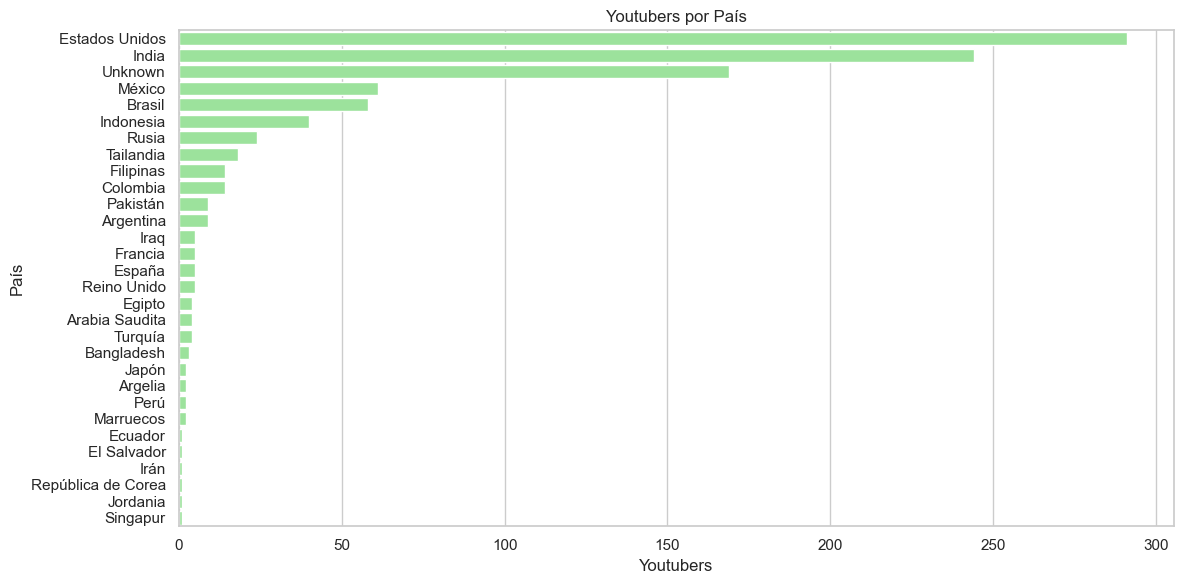

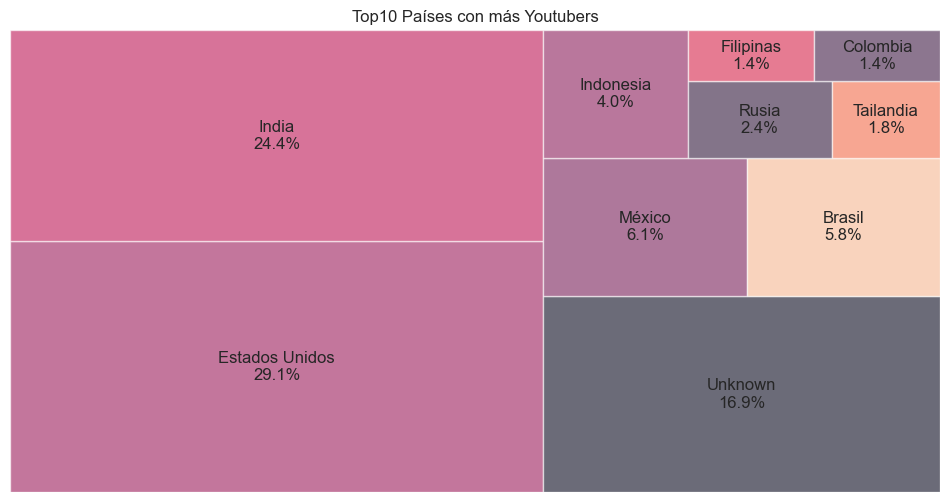

In [67]:
# Cantidad total de Youtubers por Pa√≠s
youtubers_country = df_clean["Country"].value_counts()

sns.barplot(x=youtubers_country.values, y=youtubers_country.index, color="lightgreen")
plt.title("Youtubers por Pa√≠s")
plt.xlabel("Youtubers")
plt.ylabel("Pa√≠s")
plt.tight_layout()
plt.show()

# Treemap del Top10
y_c_top10 = youtubers_country[:10]
labels = [f"{country}\n{viewers/10}%" for country, viewers in zip(y_c_top10.index, y_c_top10.values)]

squarify.plot(sizes=y_c_top10.values, label=labels, alpha=0.6)
plt.title("Top10 Pa√≠ses con m√°s Youtubers")
plt.axis("off")
plt.show()

En este primer gr√°fico, podemos deducir, que el mayor √©xito de Youtube se centra en creadores de contenido de EEUU e India (53.5%), seguido de los youtubers cuyo origen desconocemos (Unknown, 16.9%), y el tercer pa√≠s identificado ser√≠a M√©xico (6.1%).

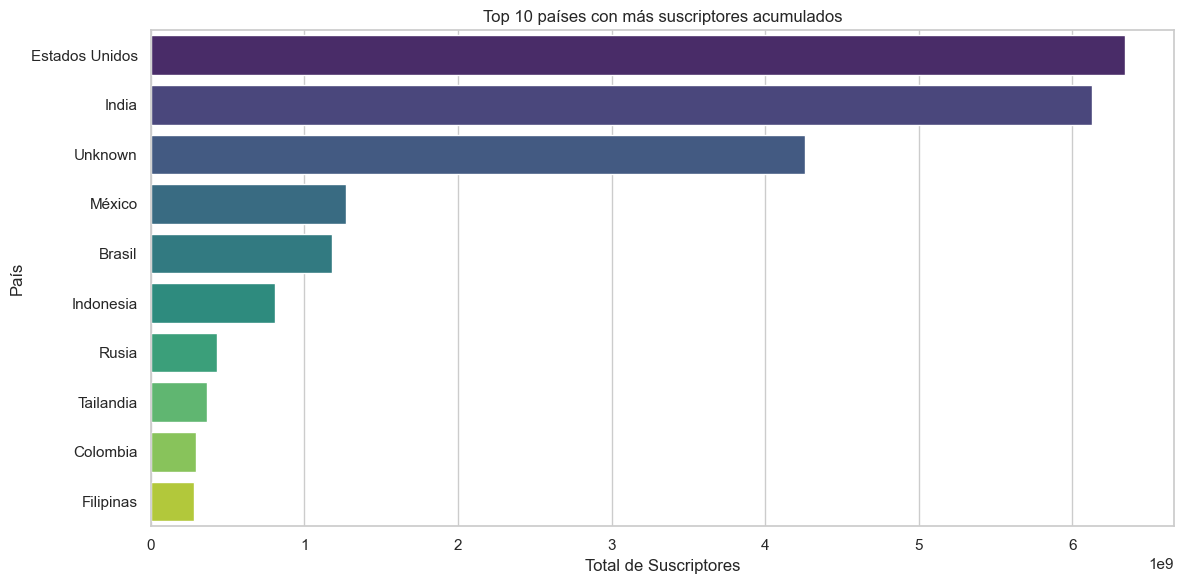

In [52]:
# Top10 pa√≠ses con m√°s suscriptores
top_countries = df_clean.groupby("Country")["Suscribers"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="viridis")
plt.title("Top 10 pa√≠ses con m√°s suscriptores acumulados")
plt.xlabel("Total de Suscriptores")
plt.ylabel("Pa√≠s")
plt.tight_layout()
plt.show()

A primera vista podr√≠a parecer que es el mismo resultado que en anterior top10, pero si observamos con cuidado, veremos que Colombia ha adelantado a Filipinas. 
Esto se debe a que pese a tener ambos el mismo n√∫mero de creadorees de contenido, los youtubers de Colombia reciben mayor respaldo.
¬øQuiz√°s debido al idioma? Eso ya ser√≠a un estudio de mayor profundidad.

De hecho, podr√≠a haber sucedido que, teniendo EEUU el mayor porcentaje de creadores de contenido dentro del top1000 mundial, estos fuesen los de menor cantidad de suscriptores, y los catorce youtubers de Colombia estuvieran en el top15.

Por ello, vamos con el siguiente gr√°fico:

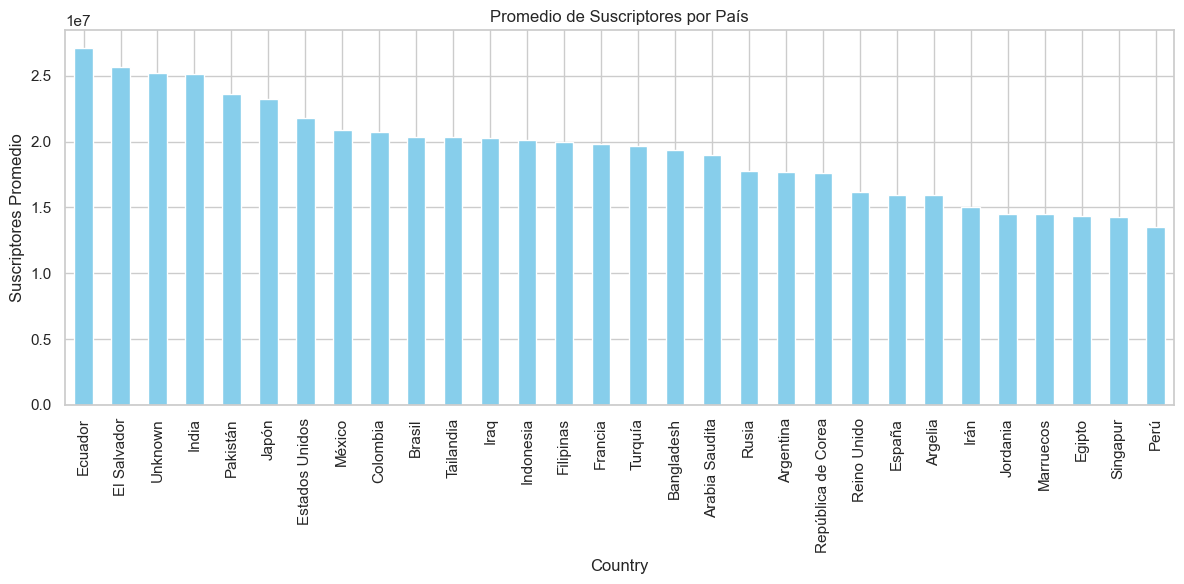

In [19]:
# Promedio de Suscriptores por Pa√≠s
avg_subs_country = df.groupby("Country")["Suscribers"].mean().sort_values(ascending=False)

avg_subs_country.plot(kind="bar", color="skyblue")
plt.title("Promedio de Suscriptores por Pa√≠s")
plt.ylabel("Suscriptores Promedio")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Vemos que lo planteado anteriormente est√° cerca de cumplirse, ya que EEUU y Colombia est√°n muy cerca el uno del otro, respecto al promedio de suscriptores por canal.  
India por otro lado, ha adelantado a EEUU junto con otros pa√≠ses que no ve√≠amos en el anterior gr√°fico.

---

Continuamos con los tops relacionados con, o basados en, las Categor√≠as. Al haber limpiado el dataset, contamos con un total de 25 categor√≠as (entre ellos el Unknown):  
- Cantidad total de youtubers por categor√≠a.  
- Suscriptores por categor√≠a y su promedio (este no ser√° top10).  
- Visitas totales por categor√≠a.  
- Likes por categor√≠a.

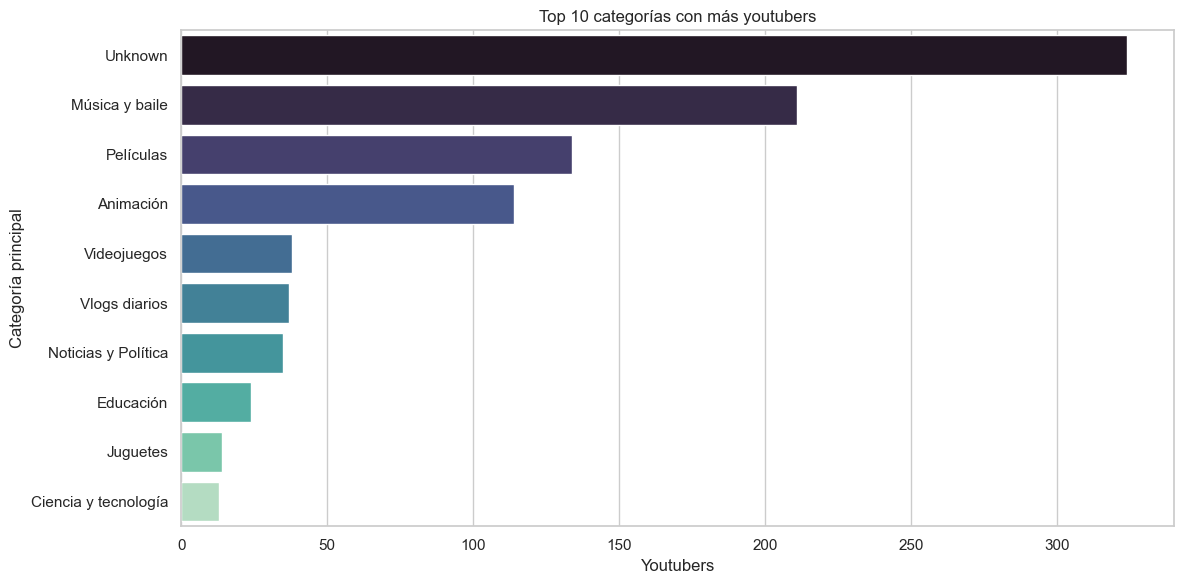

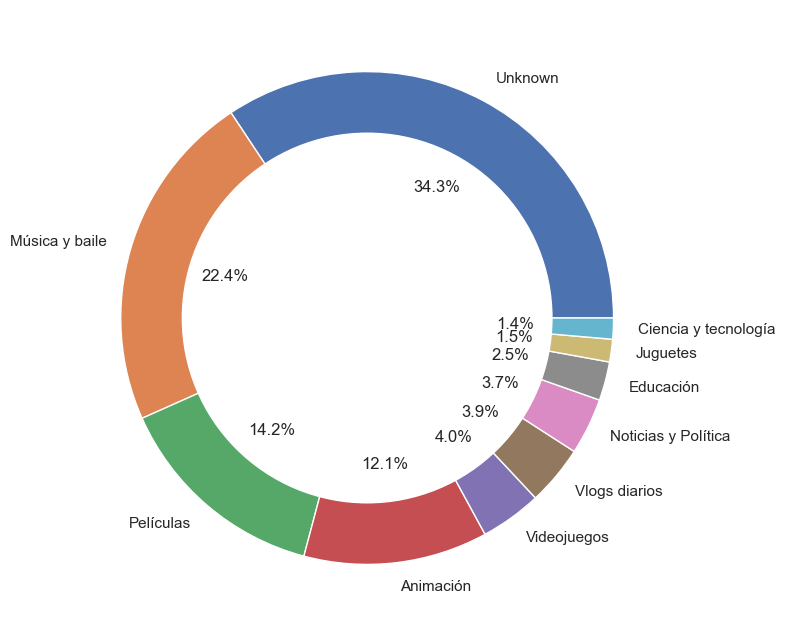

In [73]:
# Top10 categor√≠as con m√°s youtubers
top_categories = df_clean["MainCategory"].value_counts().head(10)

sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette="mako")
plt.title("Top 10 categor√≠as con m√°s youtubers")
plt.xlabel("Youtubers")
plt.ylabel("Categor√≠a principal")
plt.tight_layout()
plt.show()

# Donut chart 
my_circle=plt.Circle( (0,0),
                     0.75, 
                     color="white")
plt.figure(figsize=(8,8))
plt.pie(top_categories.values,
        labels=top_categories.index,
        autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

Tal y como vimos en el an√°lisis previo, 324 youtubers no tienen una categor√≠a predefinida para el contenido que crean. Por ello "Unknown" nos aparece como la categor√≠a m√°s popular (34.3%).
Seguido por M√∫sica y baile (22.4%), Pel√≠culas (14.2%) y Animaci√≥n (12.1%), podemos intuir que youtube (igual que hace 15 a√±os) sigue siendo una plataforma id√≥nea para acceder a contenido relacionado con las artes; la musica y la danza la cuarta y quinta, y el mundo del cine la s√©ptima. 

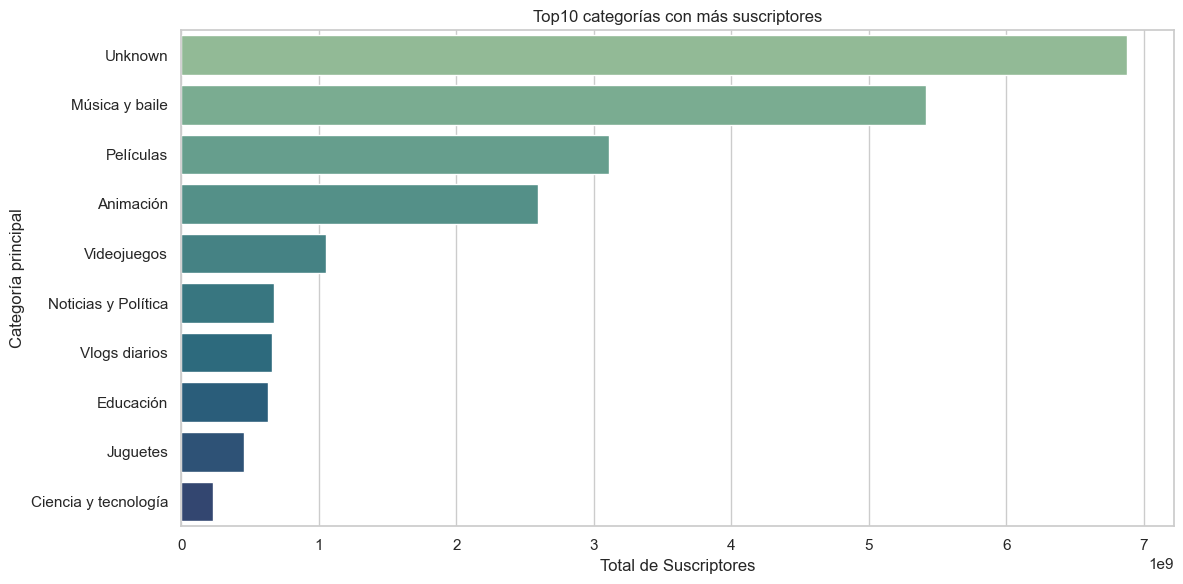

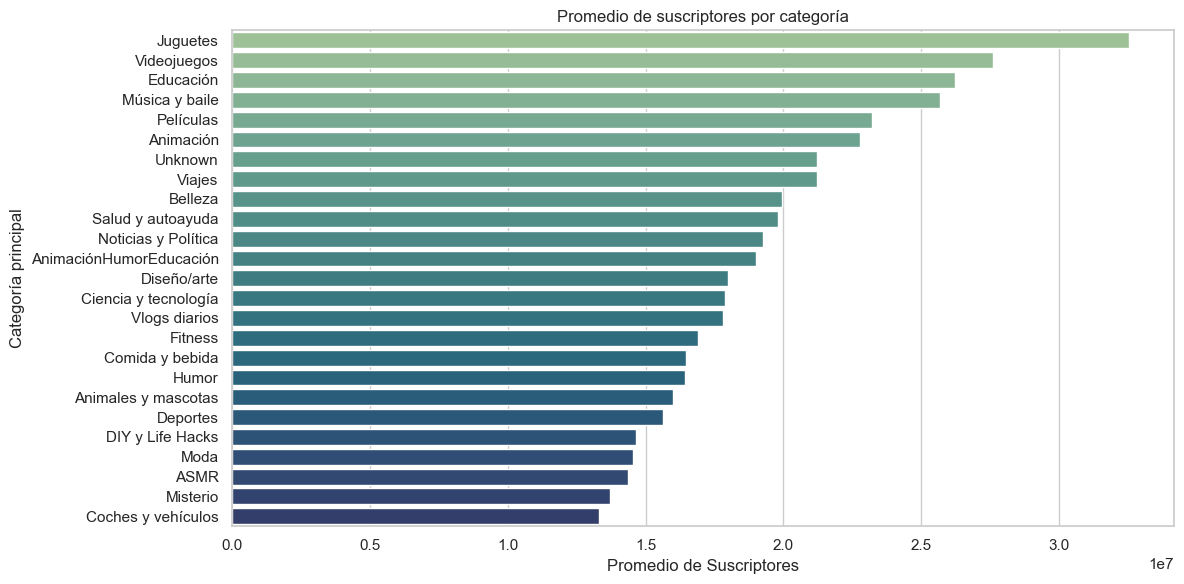

In [90]:
# Top10 Categor√≠as con m√°s suscriptores
subs_by_cat = df_clean.groupby("MainCategory")["Suscribers"].sum().sort_values(ascending=False)[:10]

sns.barplot(x=subs_by_cat.values, y=subs_by_cat.index, hue=subs_by_cat.index, palette="crest")
plt.title("Top10 categor√≠as con m√°s suscriptores")
plt.xlabel("Total de Suscriptores")
plt.ylabel("Categor√≠a principal")
plt.tight_layout()
plt.show()

# Promedio Suscriptores por Categor√≠a
avg_subs_by_cat = df_clean.groupby("MainCategory")["Suscribers"].mean().sort_values(ascending=False)

sns.barplot(x=avg_subs_by_cat.values, y=avg_subs_by_cat.index, hue=avg_subs_by_cat.index, palette="crest")
plt.title("Promedio de suscriptores por categor√≠a")
plt.xlabel("Promedio de Suscriptores")
plt.ylabel("Categor√≠a principal")
plt.tight_layout()
plt.show()

Al anamlizar las categor√≠as, vemos algo similar a lo que pasaba al analizar los pa√≠ses, y es que apenas var√≠a el ranking al mirar la cantidad de youtubers y la de suscriptores.  
Sin embargo, al analizar el promedio, vemos cambios significativos tal y como pasaba al analizar los pa√≠ses.

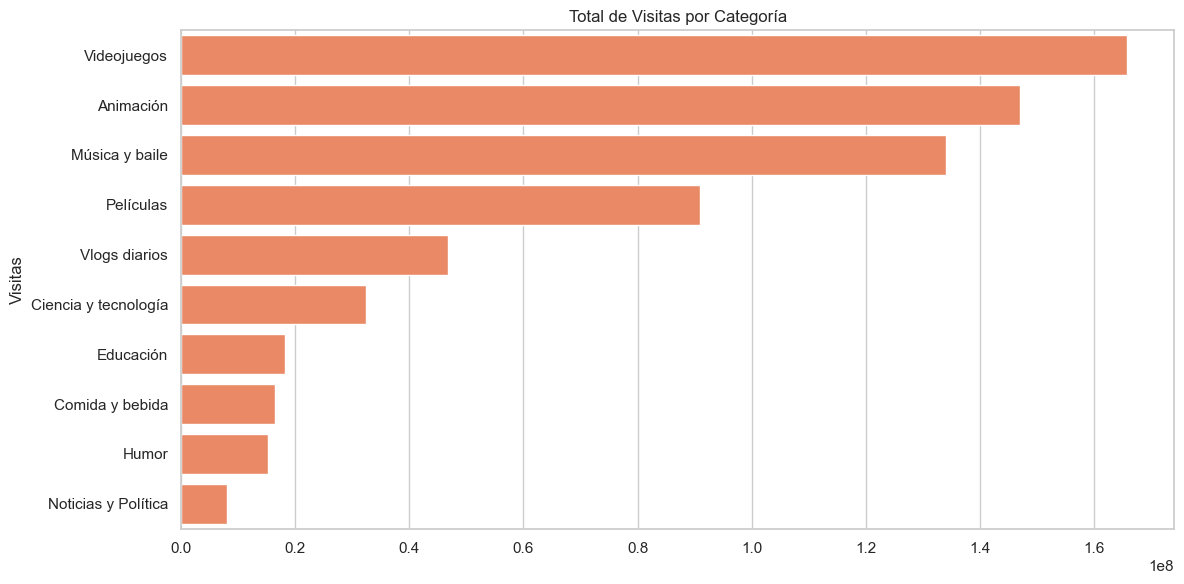

In [79]:
# Total de Visitas por Categor√≠a
total_views_category = df_clean.groupby("MainCategory")["Visits"].sum().sort_values(ascending=False).head(11)
t_v_c_no_unknown = total_views_category[1:] # Unknown duplica a la segunda categor√≠a y ensucia el gr√°fico, nos libramos de ello

sns.barplot(x=t_v_c_no_unknown.values, y=t_v_c_no_unknown.index, color="coral")
plt.title("Total de Visitas por Categor√≠a")
plt.ylabel("Visitas")
plt.tight_layout()
plt.show()

Si bien antes ve√≠amos c√≥mo la categor√≠a Videojuegos tiene un 4% de los creadores de contenido del dataset, parece ser que dichos v√≠deos son lo m√°s visitado en la plataforma.

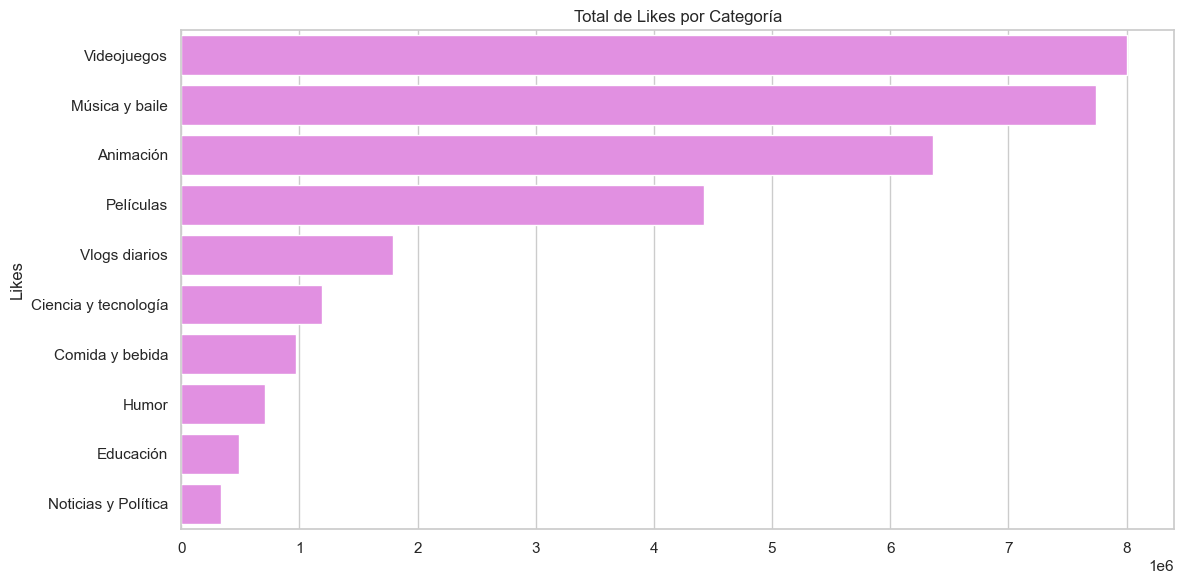

In [80]:
# Total de Likes por Categor√≠a
total_likes_category = df_clean.groupby("MainCategory")["Likes"].sum().sort_values(ascending=False).head(11)
t_l_c_no_unknown = total_likes_category[1:] # Unknown duplica a la segunda categor√≠a y ensucia el gr√°fico, nos libramos de ello

sns.barplot(x=t_l_c_no_unknown.values, y=t_l_c_no_unknown.index, color="violet")
plt.title("Total de Likes por Categor√≠a")
plt.ylabel("Likes")
plt.tight_layout()
plt.show()

Al igual que con las visitas, vemos que los Videojuegos son la categor√≠a que m√°s Likes recibe en Youtube, derrocando as√≠ a la M√∫sica y Baile.

Tras estos gr√°ficos podemos deducir, que por muchos suscriptores que se tengan los creadores de contenido de ciertas categor√≠as, eso no te asegura que vayan a ver tus videos (pese a tener acceso r√°pido) ni dar al bot√≥n de Like.

### üîÑ 4. Correlaciones

Vamos con las relaciones entre las columnas con valores num√©ricos.
Como ya dije anteriormente, intentaremos hallar mediante un **Heatmap** inicial, alg√∫n tipo de relaci√≥n entre las cifras que nos otorgan las columnas de suscriptores, visitas, likes y comentarios.

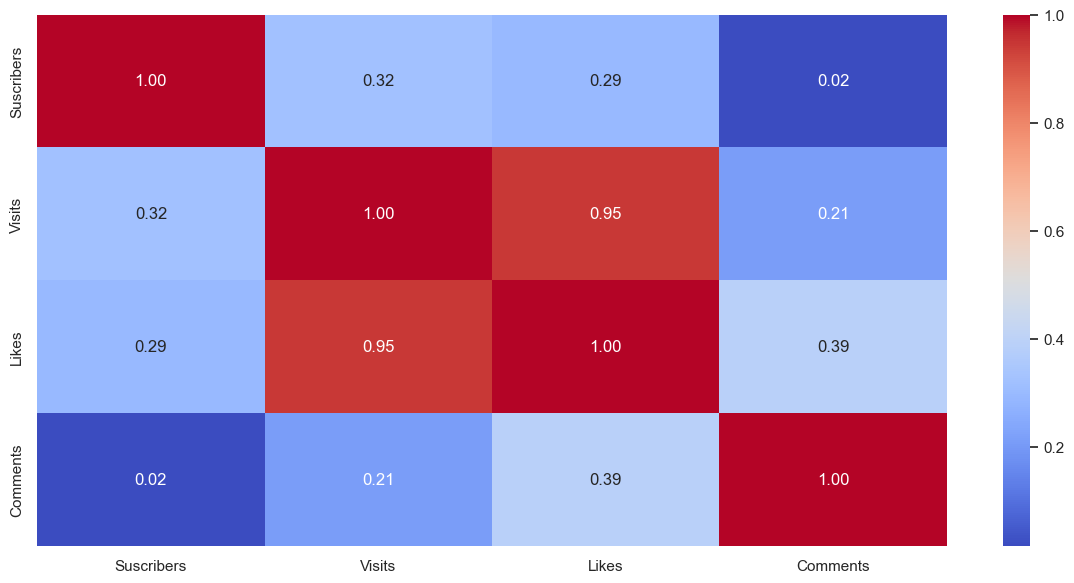

In [93]:
# Heatmap para observar posibles correlaciones a analizar (luego la top y la bottom)
corr = df_clean[["Suscribers", "Visits", "Likes", "Comments"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.tight_layout()
plt.show()

Mediante esta matriz de correlaci√≥n observamos claramente que existe un v√≠nculo entre los valores de dos columnas.
Las dem√°s relaciones son pr√°cticamente irrelevantes, salvo la de Likes y Comentarios aunque pudiera parecer algo dispersa, al estar muy cerca del 0.5.

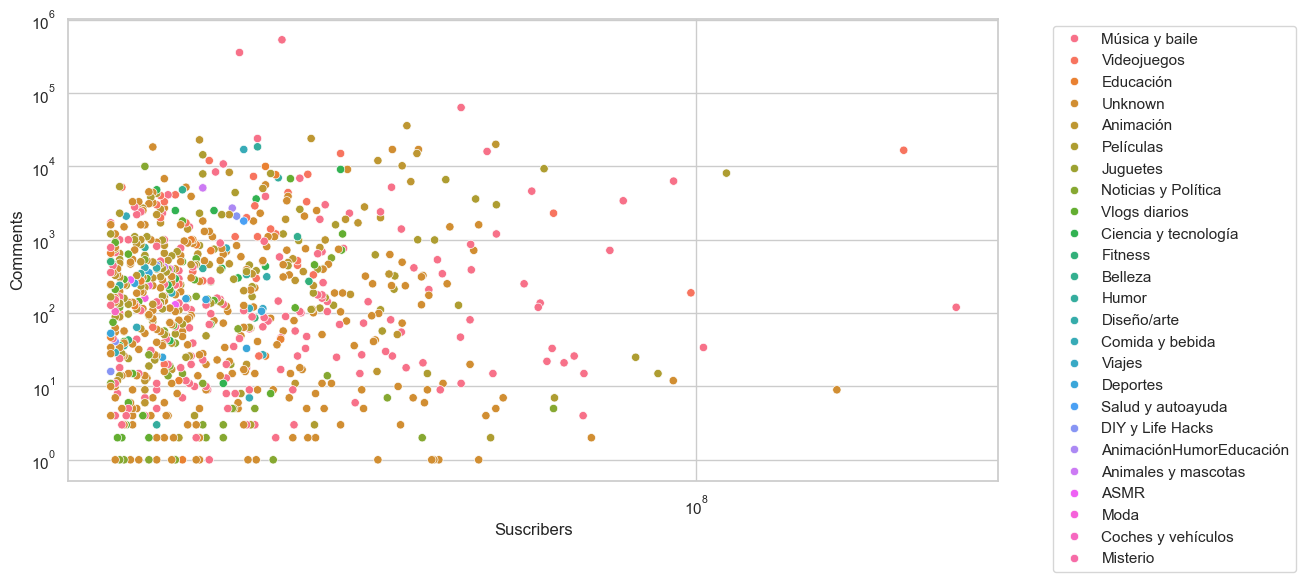

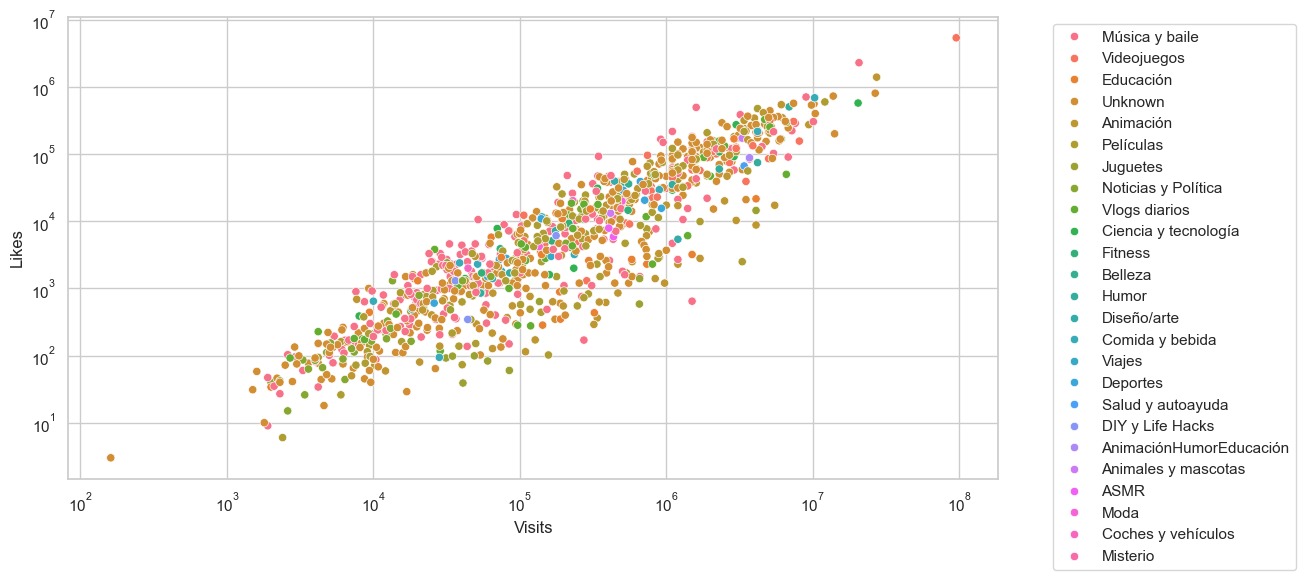

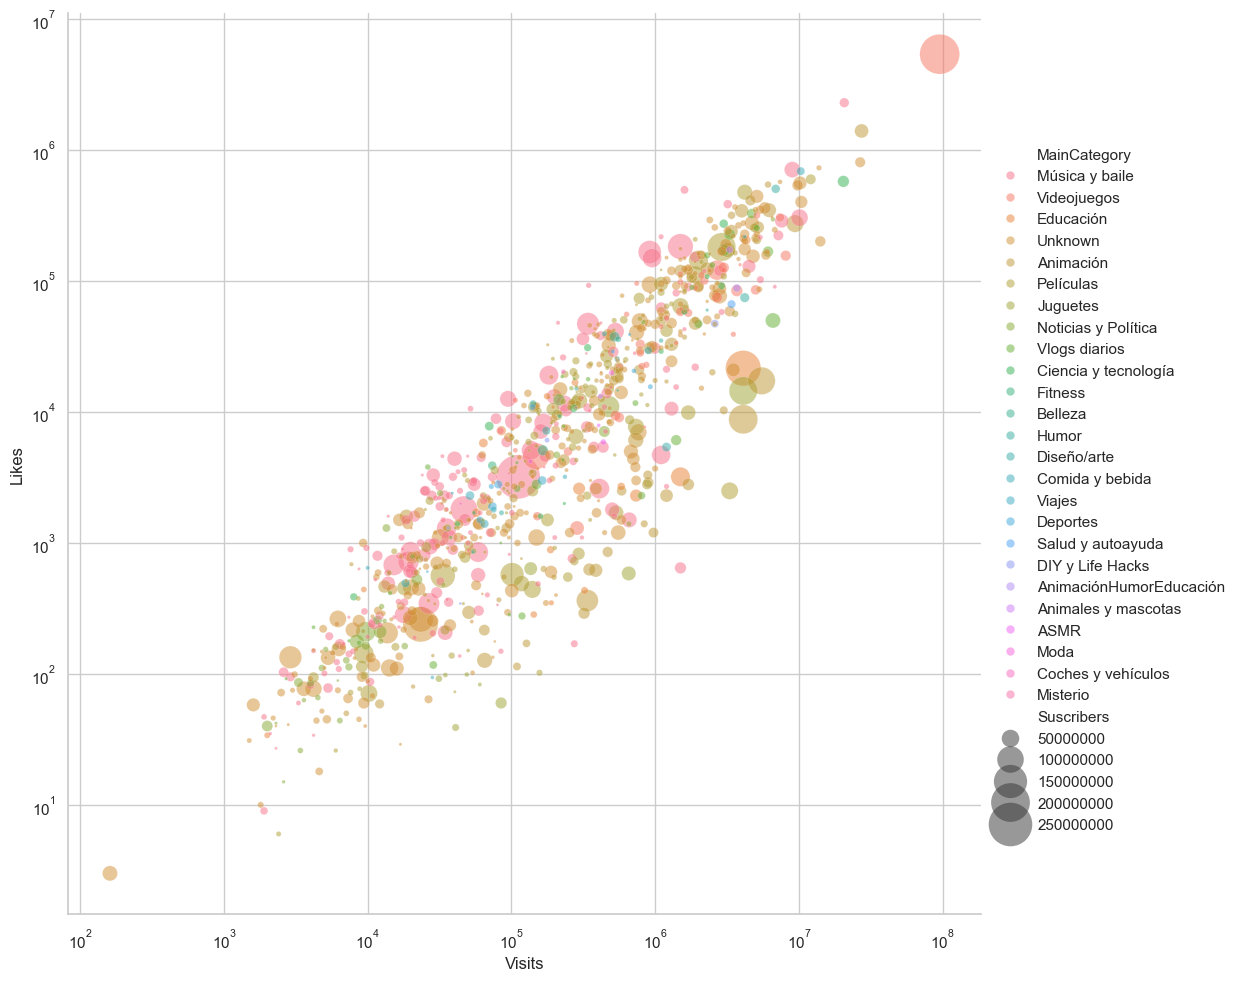

In [127]:
# Correlaci√≥n entre Suscriptores y Comentarios

sns.scatterplot(data=df_clean, x="Suscribers", y="Comments", hue="MainCategory")
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Correlaci√≥n entre Visitas al v√≠deo y Likes

sns.scatterplot(data=df_clean, x="Visits", y="Likes", hue="MainCategory")
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Bubble chart visitas/likes (tama√±o subs)

sns.relplot(data=df_clean,
            x="Visits",
            y="Likes",
            hue="MainCategory", size="Suscribers",
            sizes=(4, 1000),
            alpha=.5,
            height=10)
plt.xscale("log")
plt.yscale("log")
plt.show()

Como pudimos observar mediante la matriz de correlaci√≥n, las Visitas y los Likes est√°n correlacionados de fomra positiva, mientras que no parece existir correlaci√≥n alguna entre Comentarios y Suscriptores.  
Adem√°s, tampoco parece ser relevante al cantidad de suscriptores dentro de la correlaci√≥n de Likes y Visitas.

### ‚úÖ 5. Conclusiones del EDA

Por lo visto durante el an√°lisis, podemos sacar en claro que el ranking que muestra el dataset de [este enlace](https://www.kaggle.com/datasets/computingvictor/top1000youtubers), no realiza una evaluaci√≥n justa de sus creadores de contenido, ya que el n√∫mero de suscriptores no garantiza mayor cantidad de visualizaciones, ni interacciones con el v√≠deo (Likes o Comentarios).
Es decir, que los creadores pueden haber participado en m√∫ltiples campa√±as de marketing o publicidad, ajenas a su habitual contenido en la plataforma para as√≠ captar atenci√≥n de la audiencia no habitual de Youtube, ganando de este modo suscriptores pero sin implementar los eventos de click relacionados con sus v√≠deos.

Para respaldar dicha afirmaci√≥n, recomiendo la lectura del siguiente [art√≠culo](https://blog.hootsuite.com/es/algoritmo-de-youtube/), en el cual se explica el funcionamiento del **algoritmo de Youtube**, y c√≥mo se determina la visibilidad de los videos en la plataforma. Como podremos observar, el algoritmo de Youtube tiene en cuenta factores como la interacci√≥n del usuario con el contenido, la calidad del video, la relevancia del contenido, todos ellos por encima de la cantidad de suscriptores totales acumulados.

Por lo tanto, es posible que los v√≠deos con contenido de alta calidad y relevancia para el usuario, sean los que obtengan mayor visibilidad en la plataforma.
Es decir, no obtenemos recomendaciones de los canales con mayor n√∫mero de suscriptores, sino de los que ofrecen contenido de mayor calidad y relevancia para el usuario, en base a sus interacciones previas y a las de otros usuarios con interacciones similares.